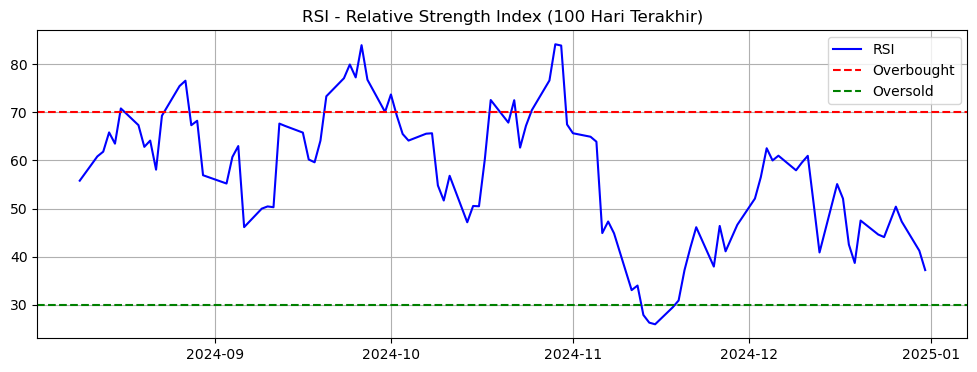

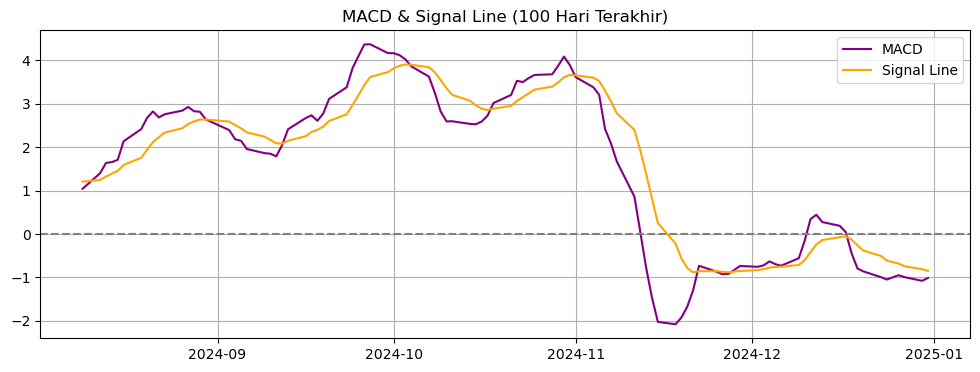

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
df = pd.read_csv("../data/gld_clean.csv", skiprows=2)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# === RSI ===
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# === MACD ===
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# === Plot RSI ===
plt.figure(figsize=(12,4))
plt.plot(df['RSI'].tail(100), label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("RSI - Relative Strength Index (100 Hari Terakhir)")
plt.legend()
plt.grid(True)
plt.show()

# === Plot MACD ===
plt.figure(figsize=(12,4))
plt.plot(df['MACD'].tail(100), label='MACD', color='purple')
plt.plot(df['Signal'].tail(100), label='Signal Line', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("MACD & Signal Line (100 Hari Terakhir)")
plt.legend()
plt.grid(True)
plt.show()
